# Assignment 6 - Kunal Khanra 4329

In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
df1 = pd.read_csv(r'C:\Users\Kunal\Downloads\airquality.csv')
df2 = pd.read_csv(r'C:\Users\Kunal\Downloads\Humidity.csv')

In [4]:
df1.head() , df2.head()

(   Unnamed: 0  Ozone  Solar.R  Wind  Temp  Month  Day
 0           1   41.0    190.0   7.4    67      5    1
 1           2   36.0    118.0   8.0    72      5    2
 2           3   12.0    149.0  12.6    74      5    3
 3           4   18.0    313.0  11.5    62      5    4
 4           5    NaN      NaN  14.3    56      5    5,
    Day  Month  Humidity
 0    1      5        67
 1    2      5        72
 2    3      5        74
 3    4      5        62
 4    5      5        56)

In [5]:
#print Numeber of Rows and Columns

In [7]:
df1.shape , df2.shape

((153, 7), (153, 3))

# 1. Data Cleaning

In [8]:
# Count the Number of NA Values present in each Column 

In [9]:
df1.isna().sum(axis = 0)

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64

In [10]:
# Replace each NA with mean with of its Column

In [11]:
df1 = df1.fillna(df1.mean())
df1.isna().sum(axis = 0)

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
dtype: int64

In [12]:
df2.isna().sum(axis = 0)

Day         0
Month       0
Humidity    0
dtype: int64

In [13]:
df1.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [14]:
df2.describe()

,Day,Month,Humidity
count,153.000000,153.000000,153.000000
mean,15.803922,6.993464,77.882353
std,8.864520,1.416522,9.465270
min,1.000000,5.000000,56.000000
25%,8.000000,6.000000,72.000000
50%,16.000000,7.000000,79.000000
75%,23.000000,8.000000,85.000000
max,31.000000,9.000000,97.000000


# 2. Data Integration

In [15]:
# Merging The Two Data Frames

In [33]:
merged_df = df1.merge(df2 , how = 'left')

In [34]:
merged_df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.00000,190.000000,7.4,67,5,1,67
1,2,36.00000,118.000000,8.0,72,5,2,72
2,3,12.00000,149.000000,12.6,74,5,3,74
3,4,18.00000,313.000000,11.5,62,5,4,62
4,5,42.12931,185.931507,14.3,56,5,5,56


In [35]:
merged_df.shape

(153, 8)

# 3. Data Transformation

In [36]:
# Adding a New Column 'Fire Prediction' if Temp > 60 and Humidity < 50 Fire_Prediction = True else False

In [46]:
def myFunc(Temp , Humidity):
    if Temp > 50 and Humidity < 60:
        return True
    return False
merged_df['Fire_Prediction'] = merged_df.apply(lambda x : myFunc(x['Temp'] , x['Humidity']) , axis = 1)

In [47]:
# Adding a new column 'Cyclone Alert', if Wind value is greater than 10 , Cyclone Alert = True else False

In [48]:
merged_df['Cyclone_alert'] = merged_df['Wind'].apply(lambda x : True if x >= 10 else False)

In [49]:
merged_df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity,Fire_Prediction,Cyclone_alert
0,1,41.00000,190.000000,7.4,67,5,1,67,False,False
1,2,36.00000,118.000000,8.0,72,5,2,72,False,False
2,3,12.00000,149.000000,12.6,74,5,3,74,False,True
3,4,18.00000,313.000000,11.5,62,5,4,62,False,True
4,5,42.12931,185.931507,14.3,56,5,5,56,True,True


In [54]:
merged_df['Fire_Prediction'].describe()

count       153
unique        2
top       False
freq        145
Name: Fire_Prediction, dtype: object

In [55]:
# Adding a new column 'Humidity Range' for finding the range in which Humidity value lies

In [56]:
merged_df['Humidity_Range'] = pd.cut(merged_df['Humidity'] , bins = [0,15,30,45,60,75,90,100] , right = True)
merged_df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity,Fire_Prediction,Cyclone_alert,Humidity_Range
0,1,41.00000,190.000000,7.4,67,5,1,67,False,False,"(60, 75]"
1,2,36.00000,118.000000,8.0,72,5,2,72,False,False,"(60, 75]"
2,3,12.00000,149.000000,12.6,74,5,3,74,False,True,"(60, 75]"
3,4,18.00000,313.000000,11.5,62,5,4,62,False,True,"(60, 75]"
4,5,42.12931,185.931507,14.3,56,5,5,56,True,True,"(45, 60]"
...,...,...,...,...,...,...,...,...,...,...,...
148,149,30.00000,193.000000,6.9,70,9,26,70,False,False,"(60, 75]"
149,150,42.12931,145.000000,13.2,77,9,27,77,False,True,"(75, 90]"
150,151,14.00000,191.000000,14.3,75,9,28,75,False,True,"(60, 75]"
151,152,18.00000,131.000000,8.0,76,9,29,76,False,False,"(75, 90]"


# 4. Data Model Building

In [58]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [60]:
Feature_Col = ['Ozone' , 'Solar.R' , 'Wind' , 'Temp' , 'Month' , 'Day' , 'Humidity']
X = merged_df[Feature_Col]
y = merged_df['Fire_Prediction']

In [61]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 0)

from sklearn.ensemble import RandomForestClassifier

In [64]:
Random_forest = RandomForestClassifier()

In [65]:
model = Random_forest.fit(X_train , y_train)

In [66]:
y_pred = model.predict(X_test)

In [67]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
cnf_matrix

array([[43,  0],
       [ 0,  3]], dtype=int64)

In [68]:
class_names = [0,1]

Text(0.5, 257.44, 'predicted Values')

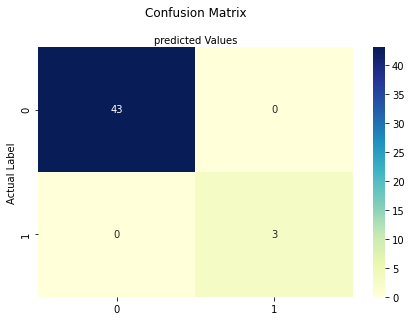

In [70]:
fig , ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks , class_names)
plt.yticks(tick_marks , class_names)

#create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix) , annot=True, cmap="YlGnBu" , fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix" , y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('predicted Values')

In [71]:
print("Accuracy",metrics.accuracy_score(y_test , y_pred))

Accuracy 1.0
